
# Basic Cleaning: Handling the  missing values (NFL data set)


## Setting up: Install required packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data file

In [3]:
df1 = pd.read_csv('../data/raw/nfl_data.csv')

C:\Users\Jishan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Exploratory Data Analysis(EDA)

### Check the dimension of the data set

In [102]:
#print(df1)
df1.shape


(407688, 102)

### Identification of variables and data types

In [103]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407688 entries, 0 to 407687
Columns: 102 entries, Date to Season
dtypes: float64(33), int64(31), object(38)
memory usage: 317.3+ MB


In [104]:
df1.head()

Date      GameID  Drive  qtr  down   time  TimeUnder  TimeSecs  \
0  2009-09-10  2009091000      1    1   NaN  15:00         15    3600.0   
1  2009-09-10  2009091000      1    1   1.0  14:53         15    3593.0   
2  2009-09-10  2009091000      1    1   2.0  14:16         15    3556.0   
3  2009-09-10  2009091000      1    1   3.0  13:35         14    3515.0   
4  2009-09-10  2009091000      1    1   4.0  13:27         14    3507.0   

   PlayTimeDiff SideofField  ...    yacEPA  Home_WP_pre  Away_WP_pre  \
0           0.0         TEN  ...       NaN     0.485675     0.514325   
1           7.0         PIT  ...  1.146076     0.546433     0.453567   
2          37.0         PIT  ...       NaN     0.551088     0.448912   
3          41.0         PIT  ... -5.031425     0.510793     0.489207   
4           8.0         PIT  ...       NaN     0.461217     0.538783   

   Home_WP_post  Away_WP_post  Win_Prob       WPA    airWPA    yacWPA  Season  
0      0.546433      0.453567  0.485675  0.060758       NaN       NaN    2009  
1      0.551088      0.448912  0.546433  0.004655 -0.032244  0.036899    2009  
2      0.510793      0.489207  0.551088 -0.040295       NaN       NaN    2009  
3      0.461217      0.538783  0.510793 -0.049576  0.106663 -0.156239    2009  
4      0.558929      0.441071  0.461217  0.097712       NaN       NaN    2009  

[5 rows x 102 columns]

In [105]:
df1.dtypes

Date                            object
GameID                           int64
Drive                            int64
qtr                              int64
down                           float64
time                            object
TimeUnder                        int64
TimeSecs                       float64
PlayTimeDiff                   float64
SideofField                     object
yrdln                          float64
yrdline100                     float64
ydstogo                          int64
ydsnet                           int64
GoalToGo                       float64
FirstDown                      float64
posteam                         object
DefensiveTeam                   object
desc                            object
PlayAttempted                    int64
Yards.Gained                     int64
sp                               int64
Touchdown                        int64
ExPointResult                   object
TwoPointConv                    object
DefTwoPoint              

### Summary statistics

In [106]:
df1.describe()

GameID          Drive            qtr           down  \
count  4.076880e+05  407688.000000  407688.000000  346534.000000   
mean   2.013158e+09      12.316158       2.577412       2.002476   
std    2.572839e+06       7.149527       1.129750       1.006353   
min    2.009091e+09       1.000000       1.000000       1.000000   
25%    2.011101e+09       6.000000       2.000000       1.000000   
50%    2.013111e+09      12.000000       3.000000       2.000000   
75%    2.015121e+09      18.000000       4.000000       3.000000   
max    2.017123e+09      35.000000       5.000000       4.000000   

           TimeUnder       TimeSecs   PlayTimeDiff          yrdln  \
count  407688.000000  407464.000000  407244.000000  406848.000000   
mean        7.374200    1695.268944      20.576762      28.488327   
std         4.642388    1062.801012      17.969326      12.946471   
min         0.000000    -900.000000       0.000000       1.000000   
25%         3.000000     778.000000       5.000000      20.000000   
50%         7.000000    1800.000000      17.000000      30.000000   
75%        11.000000    2585.000000      37.000000      39.000000   
max        15.000000    3600.000000     943.000000      50.000000   

          yrdline100        ydstogo  ...         yacEPA    Home_WP_pre  \
count  406848.000000  407688.000000  ...  159190.000000  382734.000000   
mean       48.644081       7.309403  ...      -0.386086       0.534488   
std        25.070416       4.869987  ...       1.972715       0.285574   
min         1.000000       0.000000  ...     -14.000000       0.000000   
25%        30.000000       3.000000  ...      -0.961115       0.325123   
50%        49.000000       9.000000  ...       0.000000       0.531274   
75%        70.000000      10.000000  ...       0.485508       0.769232   
max        99.000000      50.000000  ...       9.559834       1.000000   

         Away_WP_pre   Home_WP_post   Away_WP_post       Win_Prob  \
count  382734.000000  381101.000000  381101.000000  382679.000000   
mean        0.465965       0.534791       0.465613       0.501320   
std         0.285629       0.287818       0.287867       0.287445   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.231411       0.321701       0.227694       0.276472   
50%         0.469052       0.533609       0.466670       0.504470   
75%         0.675530       0.772882       0.678833       0.725477   
max         1.000000       1.000000       1.000000       1.000000   

                 WPA         airWPA         yacWPA         Season  
count  402147.000000  159187.000000  158926.000000  407688.000000  
mean        0.002099       0.015135      -0.010480    2013.018985  
std         0.045363       0.056490       0.068139       2.576962  
min        -0.997214      -0.999881      -0.986673    2009.000000  
25%        -0.014728      -0.011518      -0.018683    2011.000000  
50%         0.000000       0.003441       0.000000    2013.000000  
75%         0.014684       0.035792       0.011431    2015.000000  
max         0.994848       0.994848       1.000000    2017.000000  

[8 rows x 64 columns]

In [108]:
summery1=df1.describe().transpose()
print(summery1)


                                count          mean           std  \
GameID                       407688.0  2.013158e+09  2.572839e+06   
Drive                        407688.0  1.231616e+01  7.149527e+00   
qtr                          407688.0  2.577412e+00  1.129750e+00   
down                         346534.0  2.002476e+00  1.006353e+00   
TimeUnder                    407688.0  7.374200e+00  4.642388e+00   
TimeSecs                     407464.0  1.695269e+03  1.062801e+03   
PlayTimeDiff                 407244.0  2.057676e+01  1.796933e+01   
yrdln                        406848.0  2.848833e+01  1.294647e+01   
yrdline100                   406848.0  4.864408e+01  2.507042e+01   
ydstogo                      407688.0  7.309403e+00  4.869987e+00   
ydsnet                       407688.0  2.594552e+01  2.486208e+01   
GoalToGo                     406848.0  4.913383e-02  2.161477e-01   
FirstDown                    378877.0  2.905085e-01  4.539977e-01   
PlayAttempted                40768

## Exploring intercorrelated numerical variables

In [109]:
#Exclude object type data to draw correlation matrix
df_corr=df1.select_dtypes(exclude=['object'])

In [110]:
df_corr.corr()

GameID     Drive       qtr      down  \
GameID                       1.000000 -0.016707  0.000594 -0.003281   
Drive                       -0.016707  1.000000  0.917050 -0.006638   
qtr                          0.000594  0.917050  1.000000  0.009883   
down                        -0.003281 -0.006638  0.009883  1.000000   
TimeUnder                   -0.007028 -0.249329 -0.032128 -0.021469   
TimeSecs                    -0.002367 -0.942744 -0.964949 -0.015410   
PlayTimeDiff                -0.008588 -0.090384 -0.055985  0.021489   
yrdln                        0.015798  0.009593  0.001363  0.003971   
yrdline100                   0.012117 -0.030920 -0.048339 -0.049604   
ydstogo                      0.003913 -0.022904 -0.013548 -0.245346   
ydsnet                       0.022236 -0.039915  0.011853 -0.010050   
GoalToGo                    -0.000739 -0.006391  0.012051 -0.010250   
FirstDown                   -0.000549 -0.033788 -0.018117  0.281191   
PlayAttempted                     NaN       NaN       NaN       NaN   
Yards.Gained                -0.020047 -0.033389 -0.025754 -0.043489   
sp                          -0.000965 -0.017544  0.000156  0.172100   
Touchdown                    0.000002 -0.006829  0.004188 -0.003789   
Safety                       0.000996  0.003870  0.002181  0.005779   
Onsidekick                   0.001734  0.041889  0.036784  0.001188   
PassAttempt                  0.012199 -0.000101  0.006807 -0.061599   
AirYards                     0.002921  0.017103  0.016788 -0.026879   
YardsAfterCatch              0.006042 -0.014533 -0.010335 -0.037676   
QBHit                        0.014054  0.005002  0.005456  0.024004   
InterceptionThrown          -0.007874  0.014472  0.013185  0.005022   
RushAttempt                 -0.014641 -0.050694 -0.036430 -0.301049   
Reception                    0.013880 -0.013375 -0.006640 -0.063400   
FieldGoalDistance            0.052667  0.034614 -0.002034 -0.115401   
Fumble                      -0.006593  0.001961  0.002815  0.000994   
Sack                         0.002708  0.006574  0.006878  0.022452   
Challenge.Replay             0.005985  0.009368  0.010492  0.016600   
...                               ...       ...       ...       ...   
ScoreDiff                   -0.006224 -0.026198 -0.023177  0.020966   
AbsScoreDiff                -0.019562  0.403666  0.367507 -0.006113   
Timeout_Indicator           -0.000835  0.078069  0.059347  0.017751   
posteam_timeouts_pre         0.020292 -0.287792 -0.227921 -0.018950   
HomeTimeouts_Remaining_Pre   0.018719 -0.293807 -0.236663 -0.018313   
AwayTimeouts_Remaining_Pre   0.022644 -0.291299 -0.234001 -0.025770   
HomeTimeouts_Remaining_Post  0.018460 -0.296087 -0.237862 -0.018988   
AwayTimeouts_Remaining_Post  0.022087 -0.294109 -0.236022 -0.026283   
No_Score_Prob                0.004588  0.299559  0.219090 -0.001238   
Opp_Field_Goal_Prob         -0.003925 -0.191061 -0.158339  0.246234   
Opp_Safety_Prob             -0.009626 -0.098894 -0.096145  0.064506   
Opp_Touchdown_Prob          -0.004491 -0.207395 -0.168481  0.220446   
Field_Goal_Prob             -0.005179 -0.120527 -0.070873  0.169309   
Safety_Prob                 -0.006890 -0.258725 -0.184112  0.214745   
Touchdown_Prob              -0.004334 -0.181022 -0.114144 -0.445128   
ExPoint_Prob                -0.005488 -0.016702 -0.006275       NaN   
TwoPoint_Prob                0.007146  0.033438  0.037320       NaN   
ExpPts                      -0.002153 -0.039991 -0.001660 -0.332888   
EPA                          0.004924 -0.005911 -0.004990  0.010352   
airEPA                      -0.000525  0.028810  0.028380  0.143181   
yacEPA                       0.009372 -0.028647 -0.026846 -0.108199   
Home_WP_pre                  0.016175  0.037824  0.035767  0.000630   
Away_WP_pre                 -0.016305 -0.034839 -0.032358 -0.000630   
Home_WP_post                 0.015885  0.037030  0.035109  0.000932   
Away_WP_post                -0.016027 -0.034399 -0.0320

In [112]:

df_corr.shape

(407688, 64)

## Visualize a correlation matrix using seaborn heat map

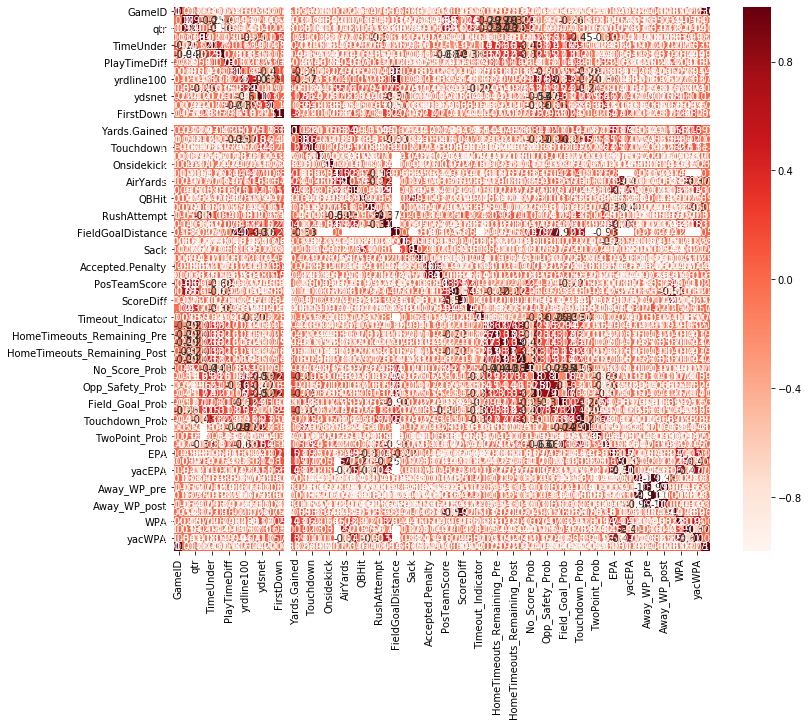

In [114]:
plt.figure(figsize=(12,10))
sns.heatmap(df_corr.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

### Determine the highly correlated variables

In [60]:
#Correlation with output variable
cor_target = abs(dfcorr.corr()["Yards.Gained"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

Yards.Gained       1.000000
YardsAfterCatch    0.493365
Reception          0.412544
EPA                0.532126
yacEPA             0.484276
WPA                0.432295
Name: Yards.Gained, dtype: float64

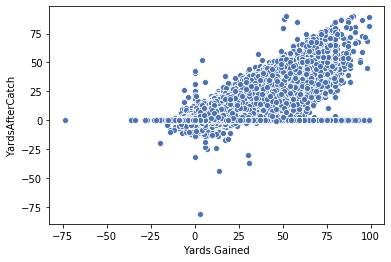

In [115]:
sns.scatterplot(x=df1['Yards.Gained'], y=df1['YardsAfterCatch']);

# Missing data exploration: highlighting graphical presentation of missing pattern

Identifying the reason of “missingness” is very important. Missingness can occur for the following reasons: 
* It was forgotten or lost;
* It was not applicable to the instance;
* It is of no interest to the instance. 


## Exploring missing pattern: Number of missing values vs. number of  non missing values

In [122]:
#column-wise sum of missing values
print("Columnwise total missing value\n",df1.isnull().sum())


Columnwise total missing value
 Date                                0
GameID                              0
Drive                               0
qtr                                 0
down                            61154
time                              224
TimeUnder                           0
TimeSecs                          224
PlayTimeDiff                      444
SideofField                       528
yrdln                             840
yrdline100                        840
ydstogo                             0
ydsnet                              0
GoalToGo                          840
FirstDown                       28811
posteam                         24992
DefensiveTeam                   24992
desc                                2
PlayAttempted                       0
Yards.Gained                        0
sp                                  0
Touchdown                           0
ExPointResult                  397578
TwoPointConv                   407083
DefTwoPoint       

In [123]:
print("Columniwise total non-missing value")
df1.count()

Columniwise total non-missing value


Date                           407688
GameID                         407688
Drive                          407688
qtr                            407688
down                           346534
time                           407464
TimeUnder                      407688
TimeSecs                       407464
PlayTimeDiff                   407244
SideofField                    407160
yrdln                          406848
yrdline100                     406848
ydstogo                        407688
ydsnet                         407688
GoalToGo                       406848
FirstDown                      378877
posteam                        382696
DefensiveTeam                  382696
desc                           407686
PlayAttempted                  407688
Yards.Gained                   407688
sp                             407688
Touchdown                      407688
ExPointResult                   10110
TwoPointConv                      605
DefTwoPoint                        24
Safety      

### Missing percentage

In [124]:
# Missing percentage
df1.isnull().sum() / df1.shape[0] * 100.00

Date                            0.000000
GameID                          0.000000
Drive                           0.000000
qtr                             0.000000
down                           15.000196
time                            0.054944
TimeUnder                       0.000000
TimeSecs                        0.054944
PlayTimeDiff                    0.108907
SideofField                     0.129511
yrdln                           0.206040
yrdline100                      0.206040
ydstogo                         0.000000
ydsnet                          0.000000
GoalToGo                        0.206040
FirstDown                       7.066924
posteam                         6.130178
DefensiveTeam                   6.130178
desc                            0.000491
PlayAttempted                   0.000000
Yards.Gained                    0.000000
sp                              0.000000
Touchdown                       0.000000
ExPointResult                  97.520162
TwoPointConv    

## Visual presentation of missing data pattern

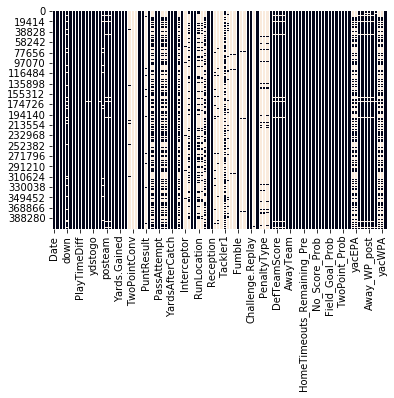

In [5]:
#LOcation of missing number
sns.heatmap(df1.isnull(), cbar=False)

 # Handling of the missing data

###  Delete variables with excess(more than 95%) missing data

Dropping features with a more than 50% missing value is usually a good choice but it is risky practice as well. This approach may lead to a loss of predictive capability as well as ability to detect statistically significant differences. As a consequence, It will be challenging for machine learning algorithms to  deal with the limited minority/rare class data. 

Refrence:

Salgado C.M., Azevedo C., Proença H., Vieira S.M. (2016) Missing Data. In: Secondary Analysis of Electronic Health Records. Springer, Cham

In [4]:
new_df2=df1[df1.columns[df1.isnull().mean() < 0.95]]

In [5]:
new_df2.isnull().sum()

Date                                0
GameID                              0
Drive                               0
qtr                                 0
down                            61154
time                              224
TimeUnder                           0
TimeSecs                          224
PlayTimeDiff                      444
SideofField                       528
yrdln                             840
yrdline100                        840
ydstogo                             0
ydsnet                              0
GoalToGo                          840
FirstDown                       28811
posteam                         24992
DefensiveTeam                   24992
desc                                2
PlayAttempted                       0
Yards.Gained                        0
sp                                  0
Touchdown                           0
Safety                              0
Onsidekick                          0
PuntResult                     385317
PlayType    

### Percentages of missing value after dropping variables

In [127]:
new_df2.isnull().sum() / new_df2.shape[0] * 100.00

Date                            0.000000
GameID                          0.000000
Drive                           0.000000
qtr                             0.000000
down                           15.000196
time                            0.054944
TimeUnder                       0.000000
TimeSecs                        0.054944
PlayTimeDiff                    0.108907
SideofField                     0.129511
yrdln                           0.206040
yrdline100                      0.206040
ydstogo                         0.000000
ydsnet                          0.000000
GoalToGo                        0.206040
FirstDown                       7.066924
posteam                         6.130178
DefensiveTeam                   6.130178
desc                            0.000491
PlayAttempted                   0.000000
Yards.Gained                    0.000000
sp                              0.000000
Touchdown                       0.000000
Safety                          0.000000
Onsidekick      

In [128]:
new_df2.shape

(407688, 90)

## Last observation carried forward method
It is a very simple and easy to implement  imputation method. However, It reduces the sample variance but increases the likelihood of Type I error. It is the least preferred method of handling missing data due to it’s biasness. 

Reerence:

Little, R. J., and Rubin, D. B. (2014), Statistical Analysis with Missing Data, New York: Wiley.

In [6]:
df_imputed=new_df2.fillna(method='pad')

In [7]:
df_imputed.isnull().sum()

Date                           0
GameID                         0
Drive                          0
qtr                            0
down                           1
time                           0
TimeUnder                      0
TimeSecs                       0
PlayTimeDiff                   0
SideofField                    0
yrdln                          0
yrdline100                     0
ydstogo                        0
ydsnet                         0
GoalToGo                       0
FirstDown                      1
posteam                        0
DefensiveTeam                  0
desc                           0
PlayAttempted                  0
Yards.Gained                   0
sp                             0
Touchdown                      0
Safety                         0
Onsidekick                     0
PuntResult                     4
PlayType                       0
Passer                         1
Passer_ID                      0
PassAttempt                    0
          

In [8]:
df_imputed.shape

(407688, 90)

### Delete the remaning missing values from the imputed data frame

In [9]:
#Delete remaning missing value
df_imputed_full=df_imputed.dropna()

In [10]:
df_imputed_full.isnull().sum()

Date                           0
GameID                         0
Drive                          0
qtr                            0
down                           0
time                           0
TimeUnder                      0
TimeSecs                       0
PlayTimeDiff                   0
SideofField                    0
yrdln                          0
yrdline100                     0
ydstogo                        0
ydsnet                         0
GoalToGo                       0
FirstDown                      0
posteam                        0
DefensiveTeam                  0
desc                           0
PlayAttempted                  0
Yards.Gained                   0
sp                             0
Touchdown                      0
Safety                         0
Onsidekick                     0
PuntResult                     0
PlayType                       0
Passer                         0
Passer_ID                      0
PassAttempt                    0
          

In [135]:
df_imputed_full.shape

(407673, 90)

## Visualization after handling the missing data

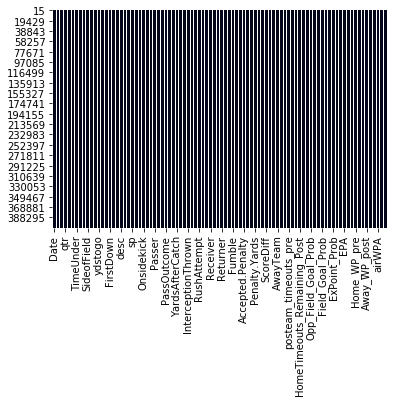

In [11]:
sns.heatmap(df_imputed_full.isnull(), cbar=False)

### Statistical significance of handling missing values

In [14]:
df_yard_gain=df1['Yards.Gained']
print("Standar deviation of Yards.Gained before handling missing values:\t", df_yard_gain.std())
df_yard_gain2=df_imputed_full['Yards.Gained']
print("Standar deviation of Yards.Gained after handling missing values:\t", df_yard_gain2.std())
df_YardsAfterCatch=df1['YardsAfterCatch']
print("Standar deviation of a YardsAfterCatch before handling missing values:\t",  df_YardsAfterCatch.std())
df_YardsAfterCatch2=df_imputed_full['YardsAfterCatch']
print("Standar deviation of YardsAfterCatch after handling missing values:\t", df_YardsAfterCatch2.std())

Standar deviation of Yards.Gained before handling missing values:	 9.10209222806908
Standar deviation of Yards.Gained after handling missing values:	 9.101981727012362
Standar deviation of a YardsAfterCatch before handling missing values:	 4.193131500144348
Standar deviation of YardsAfterCatch after handling missing values:	 4.193131028221976


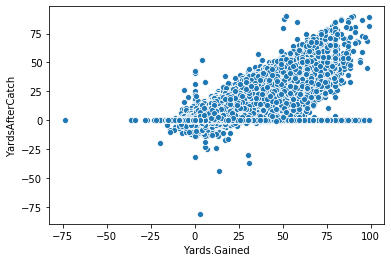

In [18]:
# PLot highly correlated varibales after the handling missing values
sns.scatterplot(x=df_imputed_full['Yards.Gained'], y=df_imputed_full['YardsAfterCatch']);

It is noticeable that the association between highly correlated variables and their corresponding standard deviation till remained almost same.  

### Dropping all missing values

Dropping all missing values implies that dropping all observations with any missing values on any variable. This can often be much very  dangerous than our expectation. However, sometimes it's useful to drop one or a few variables with a lot of missing values . It is really important to look carefully at the pattern of the missing values. 

In [19]:
df1_Dropped_all = df1.dropna()
print(df1.shape)
print(df1_Dropped_all.shape)

(407688, 102)
(0, 102)


### Proposed alternative approach

It is not statistically meaningful to perform imputation using mean, median  or interpolated values for the object type variables (e.g. zip code, permit number, phone number etc.) .  I intended to perform last observation carried forward method for qualitative/categorical variables and interpolation techniques for numerical variables simultaneously. I think that It would be a good alternative of existing methods. This proposed approach will require further analysis.

In [20]:
df_imputed_mixed = df1.copy()
for column in df1.columns:
   # print(df1[column].dtype)
    if df1[column].dtype == object:
        df_imputed_mixed[column]=df1[column].fillna(method='bfill')
    else:
       df_imputed_mixed[column]=df1[column].interpolate()
        #print("String!")

In [21]:
df_imputed_mixed.isnull().sum()

Date                              0
GameID                            0
Drive                             0
qtr                               0
down                              1
time                              0
TimeUnder                         0
TimeSecs                          0
PlayTimeDiff                      0
SideofField                       0
yrdln                             0
yrdline100                        0
ydstogo                           0
ydsnet                            0
GoalToGo                          0
FirstDown                         1
posteam                           0
DefensiveTeam                     0
desc                              0
PlayAttempted                     0
Yards.Gained                      0
sp                                0
Touchdown                         0
ExPointResult                     8
TwoPointConv                    601
DefTwoPoint                    1064
Safety                            0
Onsidekick                  

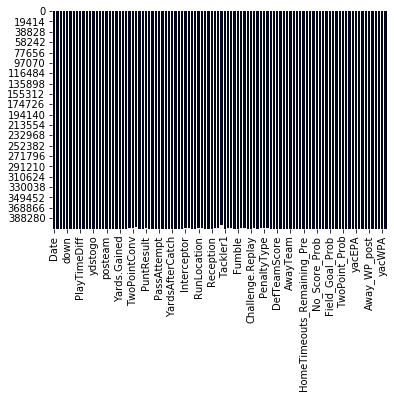

In [22]:
sns.heatmap(df_imputed_mixed.isnull(), cbar=False)